# All the Lifecycle In A Data Science Projects

1. Data Analysis
2. Feature Engineering
3. Feature Selection
4. Model Building
5. Model Deployment

In [1]:
## Data Analysis Phase
## MAin aim is to understand more about the data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
## Display all the columns of the dataframe

pd.pandas.set_option('display.max_columns',None)

In [105]:
train = pd.read_csv(r'data1.csv')
train.shape

(10999, 12)

In [106]:
test = pd.read_csv(r'data2.csv')
test.shape

(3993, 12)

In [107]:
train.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [108]:
test.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,A,Road,3,4,168,3,low,M,5,1841,NaN
1,2,B,Road,5,3,159,2,low,F,58,1990,NaN
2,3,C,Road,2,2,282,3,medium,F,42,3193,NaN
3,4,F,Road,4,3,278,4,high,M,37,3248,NaN
4,5,D,Road,6,4,256,5,low,F,6,3149,NaN


In [109]:
#dropping "ID" column from both train data set since they are no more useful
train=train.drop('ID', axis=1)

In [110]:
train.shape

(10999, 11)

In [111]:
train.head()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,D,Flight,4,2,177,3,low,F,44,1233,1
1,F,Flight,4,5,216,2,low,M,59,3088,1
2,A,Flight,2,2,183,4,low,M,48,3374,1
3,B,Flight,3,3,176,4,medium,M,10,1177,1
4,C,Flight,2,2,184,3,medium,F,46,2484,1


In [112]:
#dropping "ID" & "Reached.on.Time_Y.N" columns from test data set since they are no more useful
test=test.drop(['ID', 'Reached.on.Time_Y.N'], axis=1)

In [113]:
test.shape

(3993, 10)

In [114]:
test.head()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms
0,A,Road,3,4,168,3,low,M,5,1841
1,B,Road,5,3,159,2,low,F,58,1990
2,C,Road,2,2,282,3,medium,F,42,3193
3,F,Road,4,3,278,4,high,M,37,3248
4,D,Road,6,4,256,5,low,F,6,3149


*** checking whether data set is balanced or imbalanced dataset *** 

In [115]:
reached=train[train['Reached.on.Time_Y.N']==1]
not_reached=train[train['Reached.on.Time_Y.N']==0]

In [116]:
print(reached.shape, not_reached.shape)

(6563, 11) (4436, 11)


 *** from above observations ***
 1. We could see that in the train data set total 10999 rowas are there
 2. In that 6563 rows are having class 1 
 In that 4436 rows are having class 0 
 It is a Imbalanced data set, we should take care of this after the analysis 

# 1. Data Analysis

# In Data Analysis We will Analyze To Find out the below stuff

1. Missing Values
2. All The Numerical Variables
3. Distribution of the Numerical Variables
4. Categorical Variables
5. Cardinality of Categorical Variables
6. Outliers
7. Relationship between independent and dependent feature(Reached.on.Time_Y.N)

*** 1. Missing Values ***

In [117]:
features_with_na=[feature for feature in train.columns if train[feature].isnull().sum()>1]
features_with_na

[]

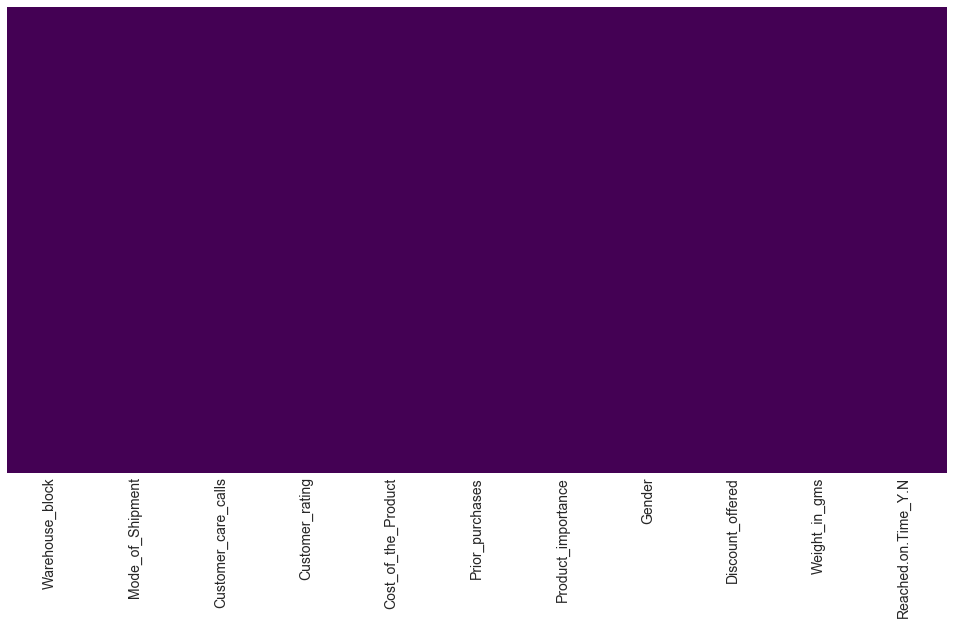

In [118]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

*** from above observation ***

1. There are no missing values in any columns

*** 2. Numerical Variables ***

In [119]:
numerical_features=[feature for feature in train.columns if train[feature].dtypes!='O']
train[numerical_features].head(3)

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,4,2,177,3,44,1233,1
1,4,5,216,2,59,3088,1
2,2,2,183,4,48,3374,1


*** Numerical variables are usually of 2 types ***

*** i. Discrete Variables ***

In [120]:
discrete_feature=[feature for feature in numerical_features if len(train[feature].unique())<25 ]

print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 4


In [121]:
train[discrete_feature].head()

,Customer_care_calls,Customer_rating,Prior_purchases,Reached.on.Time_Y.N
0,4,2,3,1
1,4,5,2,1
2,2,2,4,1
3,3,3,4,1
4,2,2,3,1


*** 2. Continuous Variable ***

In [122]:
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature]

print("Continuous feature Count {}".format(len(continuous_feature)))

Continuous feature Count 3


In [123]:
dataset[continuous_feature].head()

,Cost_of_the_Product,Discount_offered,Weight_in_gms
0,177,44,1233
1,216,59,3088
2,183,48,3374
3,176,10,1177
4,184,46,2484


In [50]:
# Graphs Presentation for continuous_feature

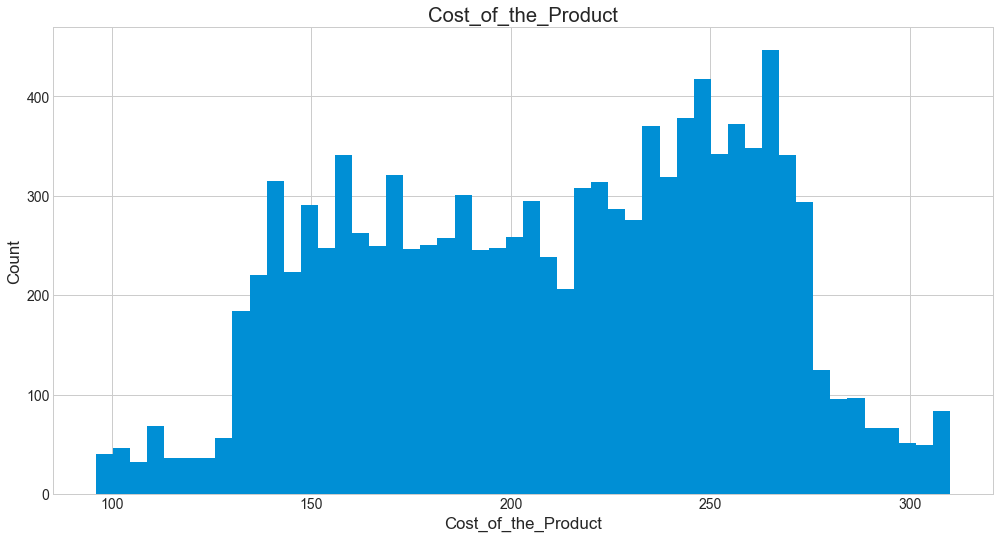

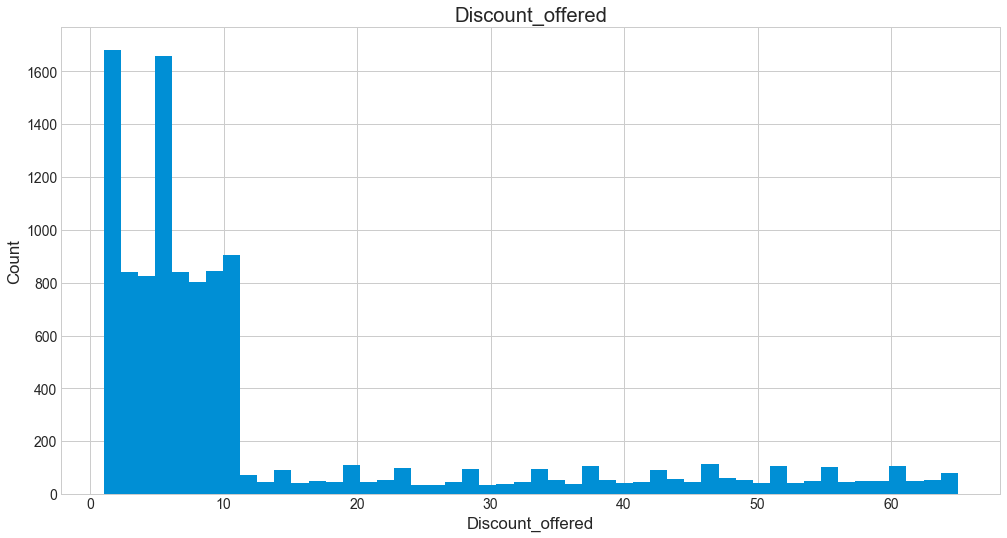

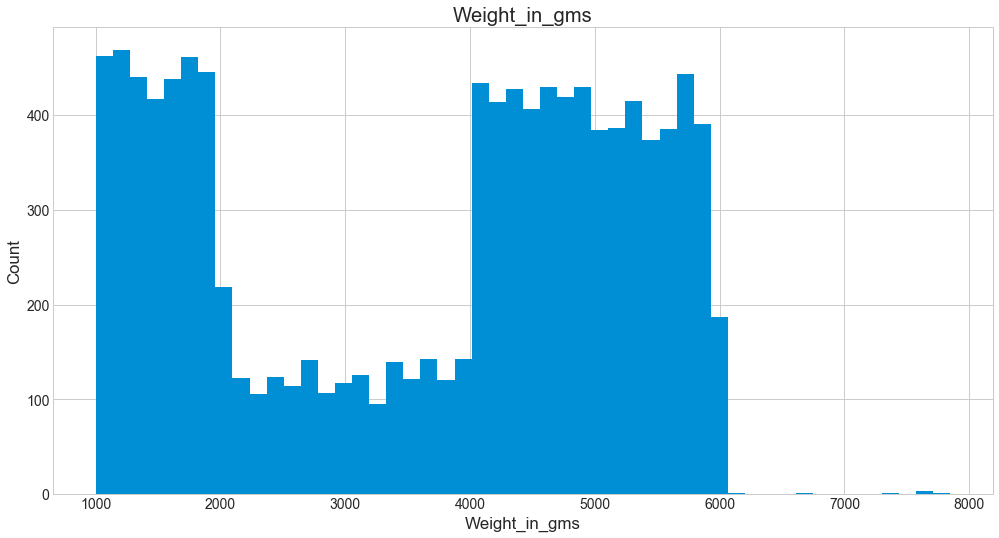

In [128]:
for feature in continuous_feature:
    data=train.copy()
    data[feature].hist(bins=50)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

*** from above observation ***
1. No variable follow normal distubution, if we want we can make use of transformation techniques 
but we are using classification techniques and ensemble techniques will check if we want or not

*** 4. Observing Outliers In Continuous Variable ***

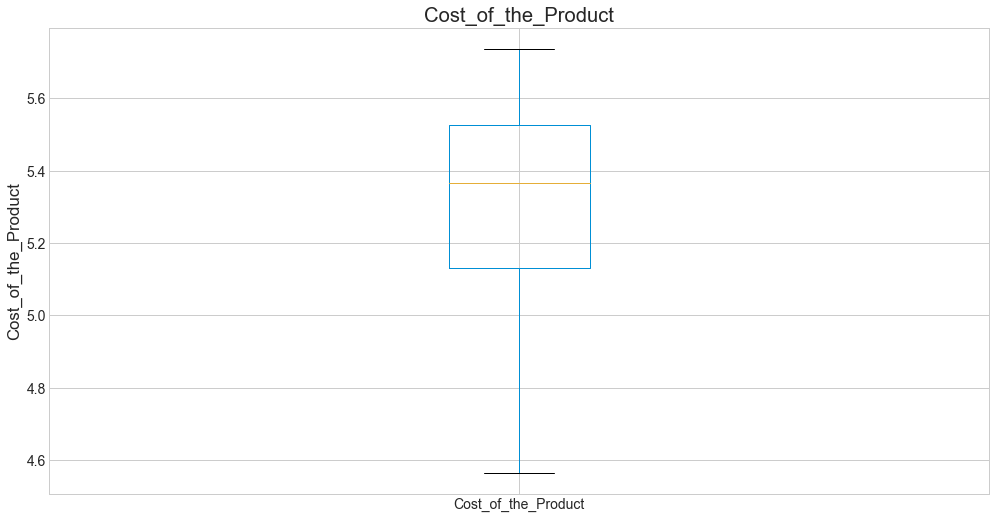

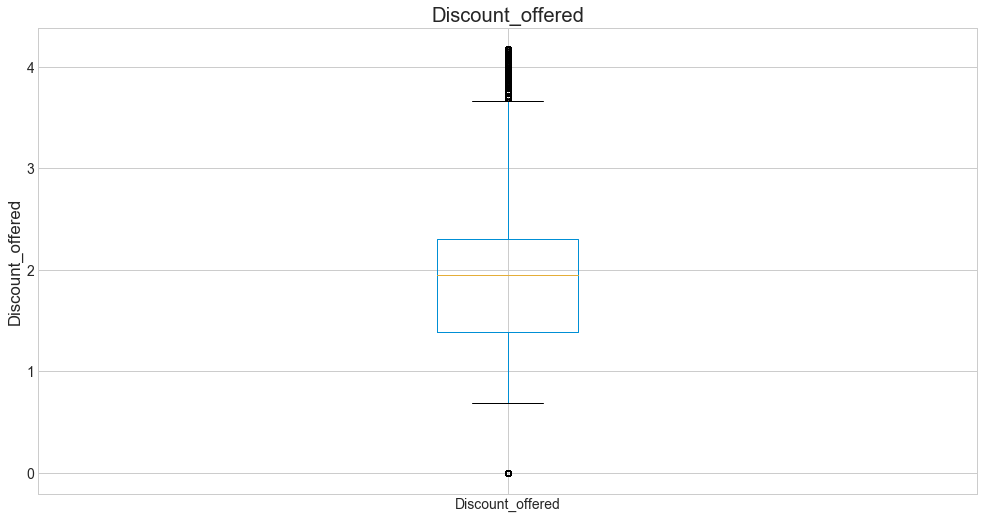

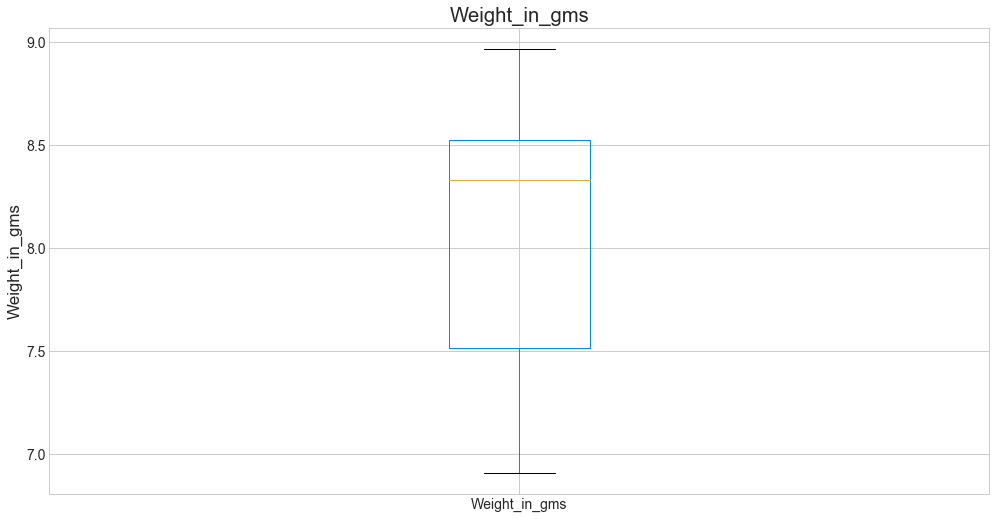

In [129]:
for feature in continuous_feature:
    data=train.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

*** from above observation ***
1. Only variable "Discount_offered" is having some outliers

*** 5. Categorical features ***

In [130]:
categorical_features=[feature for feature in train.columns if train[feature].dtypes == 'O']
train[categorical_features].head()

,Warehouse_block,Mode_of_Shipment,Product_importance,Gender
0,D,Flight,low,F
1,F,Flight,low,M
2,A,Flight,low,M
3,B,Flight,medium,M
4,C,Flight,medium,F


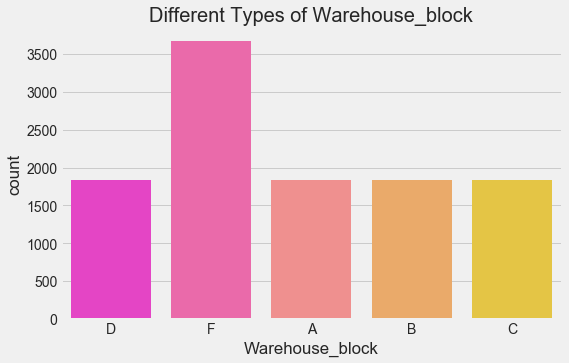

In [131]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (8, 5)

sns.countplot(train['Warehouse_block'], palette = 'spring')
plt.title('Different Types of Warehouse_block', fontsize = 20)
plt.show()

*** from above observation *** 
1. we could se that warehouse_block F is the highest count as compared to others

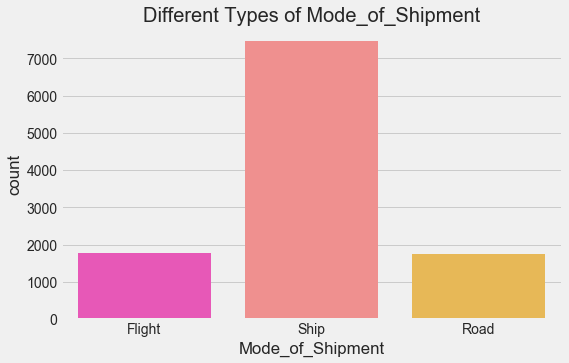

In [132]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (8, 5)

sns.countplot(train['Mode_of_Shipment'], palette = 'spring')
plt.title('Different Types of Mode_of_Shipment', fontsize = 20)
plt.show()

*** from above observation *** 
1. we could se that Mode_of_Shipment through ship  transportation is the highest count as compared to others

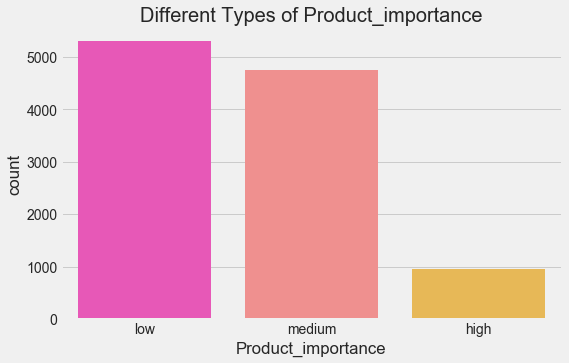

In [133]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (8, 5)

sns.countplot(train['Product_importance'], palette = 'spring')
plt.title('Different Types of Product_importance', fontsize = 20)
plt.show()

*** from above observation *** 
1. we could se that Product_importance is low for many product as well has given medium import for secondary
2. High importance products were less in number

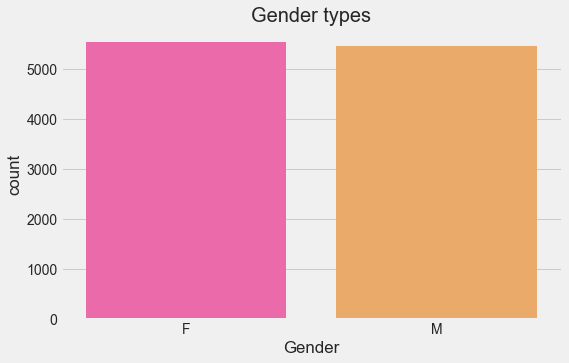

In [134]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (8, 5)

sns.countplot(train['Gender'], palette = 'spring')
plt.title('Gender types', fontsize = 20)
plt.show()

*** from above observations ***

1.  There are almost equal number of genders

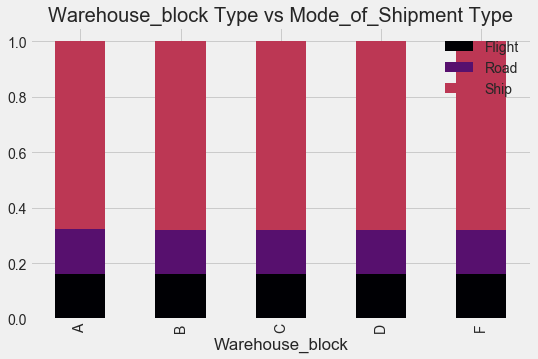

In [135]:
incident = pd.crosstab(train['Warehouse_block'], train['Mode_of_Shipment'])
colors = plt.cm.inferno(np.linspace(0, 1, 5))
incident.div(incident.sum(1).astype(float), axis = 0).plot(kind = 'bar',
                                                           stacked = True,
                                                           figsize = (8, 5),
                                                           color = colors)

plt.title('Warehouse_block Type vs Mode_of_Shipment Type', fontsize = 20)
plt.legend()
plt.show()

*** from above observation ***
1. we could see that for all the mode_of_shipment_types same warehoue_block is mapped 

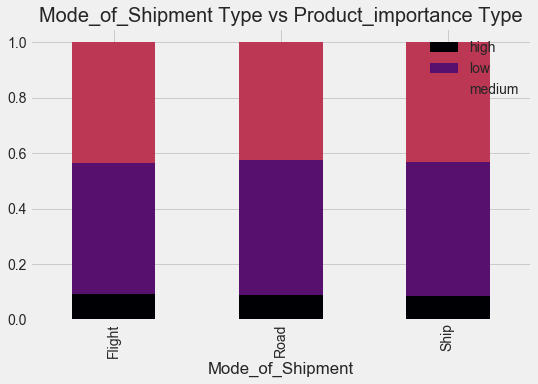

In [137]:
incident = pd.crosstab(train['Mode_of_Shipment'], train['Product_importance'])
colors = plt.cm.inferno(np.linspace(0, 1, 5))
incident.div(incident.sum(1).astype(float), axis = 0).plot(kind = 'bar',
                                                           stacked = True,
                                                           figsize = (8, 5),
                                                           color = colors)

plt.title('Mode_of_Shipment Type vs Product_importance Type', fontsize = 20)
plt.legend()
plt.show()

*** from above observations ***
1. even from the graph we can say 
  i. there are many low importance products in more number and they have been shipped through Flight, Road and shp in equal number
2. Even high importance products also have been shipped through all the shippment modes but they are very less compared to others    

*** from above observations ***
1. we could see that for ship transportation discount is more

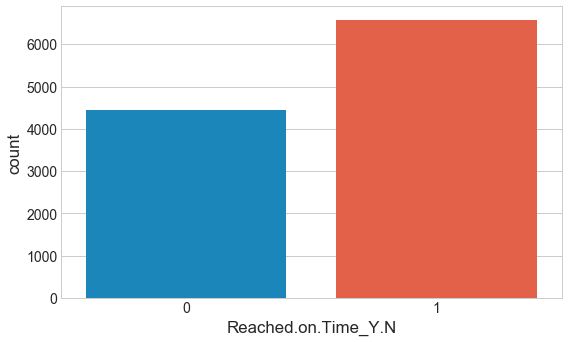

In [138]:
sns.set_style('whitegrid')
sns.countplot(x='Reached.on.Time_Y.N',data=train)

*** from above observations ***
1. we could see that there are many number which have reached on time as class 1

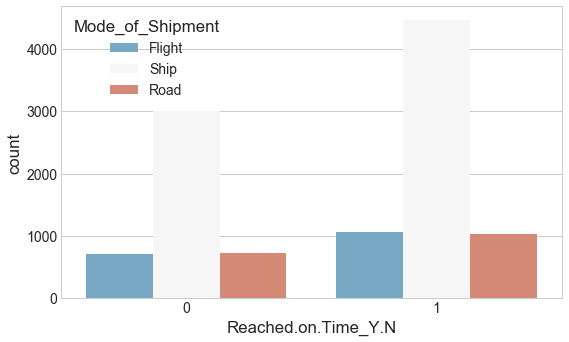

In [139]:
sns.set_style('whitegrid')
sns.countplot(x='Reached.on.Time_Y.N',hue='Mode_of_Shipment',data=train,palette='RdBu_r')

*** from above observations ***
1. class 1= reached on time so shift transportation mode only has reachd more number of times
2. class 0= reached on time so shift transportation mode only has reachd less number of times

# 2. Feature Engineering

*** 1. Data Cleaning ***
1. There are no missing values so data cleaning is required

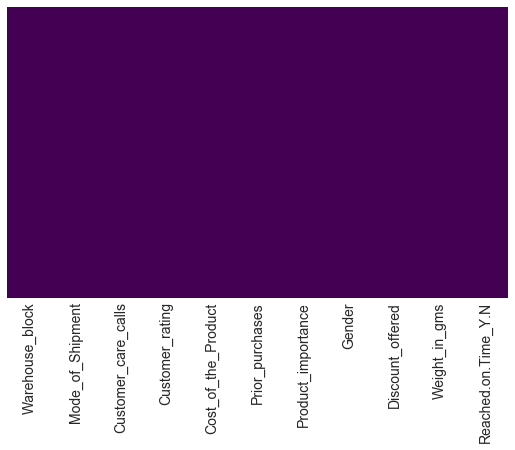

In [140]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

*** Converting Categorical Features ***

In [141]:
train[categorical_features].head()

,Warehouse_block,Mode_of_Shipment,Product_importance,Gender
0,D,Flight,low,F
1,F,Flight,low,M
2,A,Flight,low,M
3,B,Flight,medium,M
4,C,Flight,medium,F


*** first will go for Product_importance variable since its priority we can do ordinal encoding ***

In [142]:
dictionary={'high':1,'medium':2,'low':3
    
    
}

In [143]:
dictionary

{'high': 1, 'medium': 2, 'low': 3}

In [144]:
train['Product_importance_ordinal']=train['Product_importance'].map(dictionary)

In [145]:
train.head()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,Product_importance_ordinal
0,D,Flight,4,2,177,3,low,F,44,1233,1,3
1,F,Flight,4,5,216,2,low,M,59,3088,1,3
2,A,Flight,2,2,183,4,low,M,48,3374,1,3
3,B,Flight,3,3,176,4,medium,M,10,1177,1,2
4,C,Flight,2,2,184,3,medium,F,46,2484,1,2


In [146]:
#dropping "Product_importance" column from train data set since we encoded that couln to Product_importance_ordinal, so we can drop it
train=train.drop('Product_importance', axis=1)

In [147]:
train.head(2)

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,Product_importance_ordinal
0,D,Flight,4,2,177,3,F,44,1233,1,3
1,F,Flight,4,5,216,2,M,59,3088,1,3


*** encoding mode_of_shipment ***

In [148]:
Mode_of_Shipment_encode=pd.get_dummies(train['Mode_of_Shipment'],drop_first=True)

In [149]:
Mode_of_Shipment_encode.head(2)

,Road,Ship
0,0,0
1,0,0


In [150]:
train=pd.concat([train,Mode_of_Shipment_encode], axis=1)

In [151]:
train.head(2)

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,Product_importance_ordinal,Road,Ship
0,D,Flight,4,2,177,3,F,44,1233,1,3,0,0
1,F,Flight,4,5,216,2,M,59,3088,1,3,0,0


In [152]:
#dropping "Mode_of_Shipment" column from train data set since we encoded, so we can drop it
train=train.drop('Mode_of_Shipment', axis=1)

In [153]:
train.head(2)

,Warehouse_block,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,Product_importance_ordinal,Road,Ship
0,D,4,2,177,3,F,44,1233,1,3,0,0
1,F,4,5,216,2,M,59,3088,1,3,0,0


*** encoding Gender ***

In [154]:
Gender_encode=pd.get_dummies(train['Gender'],drop_first=True)

In [155]:
Gender_encode.head(2)

,M
0,0
1,1


In [156]:
train=pd.concat([train,Gender_encode], axis=1)

In [157]:
train.head(2)

,Warehouse_block,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,Product_importance_ordinal,Road,Ship,M
0,D,4,2,177,3,F,44,1233,1,3,0,0,0
1,F,4,5,216,2,M,59,3088,1,3,0,0,1


In [158]:
#dropping "Gender" column from train data set since we encoded, so we can drop it
train=train.drop('Gender', axis=1)

In [159]:
train.head()

,Warehouse_block,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,Product_importance_ordinal,Road,Ship,M
0,D,4,2,177,3,44,1233,1,3,0,0,0
1,F,4,5,216,2,59,3088,1,3,0,0,1
2,A,2,2,183,4,48,3374,1,3,0,0,1
3,B,3,3,176,4,10,1177,1,2,0,0,1
4,C,2,2,184,3,46,2484,1,2,0,0,0


*** encoding Warehouse_block using target guided encoding *** 

In [161]:
train.Warehouse_block.unique()

array(['D', 'F', 'A', 'B', 'C'], dtype=object)

In [162]:
train.groupby(['Warehouse_block'])['Reached.on.Time_Y.N'].mean()

Warehouse_block
A    0.586470
B    0.602291
C    0.596836
D    0.597601
F    0.598472
Name: Reached.on.Time_Y.N, dtype: float64

In [163]:
train.groupby(['Warehouse_block'])['Reached.on.Time_Y.N'].mean().sort_values().index

Index(['A', 'C', 'D', 'F', 'B'], dtype='object', name='Warehouse_block')

In [164]:
ordinal_labels=train.groupby(['Warehouse_block'])['Reached.on.Time_Y.N'].mean().sort_values().index
ordinal_labels

Index(['A', 'C', 'D', 'F', 'B'], dtype='object', name='Warehouse_block')

In [165]:
enumerate(ordinal_labels,0)

In [166]:
ordinal_labels2={k:i for i,k in enumerate(ordinal_labels,0)}
ordinal_labels2

{'A': 0, 'C': 1, 'D': 2, 'F': 3, 'B': 4}

In [167]:
train['Warehouse_block_ordinal_labels']=train['Warehouse_block'].map(ordinal_labels2)
train.head()

,Warehouse_block,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,Product_importance_ordinal,Road,Ship,M,Warehouse_block_ordinal_labels
0,D,4,2,177,3,44,1233,1,3,0,0,0,2
1,F,4,5,216,2,59,3088,1,3,0,0,1,3
2,A,2,2,183,4,48,3374,1,3,0,0,1,0
3,B,3,3,176,4,10,1177,1,2,0,0,1,4
4,C,2,2,184,3,46,2484,1,2,0,0,0,1


In [168]:
#dropping "Warehouse_block" column from train data set since we encoded, so we can drop it
train=train.drop('Warehouse_block', axis=1)

In [169]:
train.head()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,Product_importance_ordinal,Road,Ship,M,Warehouse_block_ordinal_labels
0,4,2,177,3,44,1233,1,3,0,0,0,2
1,4,5,216,2,59,3088,1,3,0,0,1,3
2,2,2,183,4,48,3374,1,3,0,0,1,0
3,3,3,176,4,10,1177,1,2,0,0,1,4
4,2,2,184,3,46,2484,1,2,0,0,0,1


In [170]:
train.shape

(10999, 12)

In [171]:
train.columns

Index(['Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product',
       'Prior_purchases', 'Discount_offered', 'Weight_in_gms',
       'Reached.on.Time_Y.N', 'Product_importance_ordinal', 'Road', 'Ship',
       'M', 'Warehouse_block_ordinal_labels'],
      dtype='object')

In [172]:
from sklearn.model_selection import train_test_split

In [173]:
train_data=train.drop('Reached.on.Time_Y.N',axis=1)

In [175]:
train_data.head(2)

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Product_importance_ordinal,Road,Ship,M,Warehouse_block_ordinal_labels
0,4,2,177,3,44,1233,3,0,0,0,2
1,4,5,216,2,59,3088,3,0,0,1,3


*** Feature Importance ***

In [176]:
X=train_data
y=train['Reached.on.Time_Y.N']

In [177]:
X.head(2)

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Product_importance_ordinal,Road,Ship,M,Warehouse_block_ordinal_labels
0,4,2,177,3,44,1233,3,0,0,0,2
1,4,5,216,2,59,3088,3,0,0,1,3


In [178]:
y.head(2)

0    1
1    1
Name: Reached.on.Time_Y.N, dtype: int64

*** As above said Now we are going to handle IMBALANCED DATA SET ***

In [179]:
print(reached.shape, not_reached.shape)

(6563, 11) (4436, 11)
